In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hichamachahboun/mnist-handwritten-digits")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 11.0M/11.0M [00:03<00:00, 3.54MB/s]

Extracting files...


Path to dataset files: C:\Users\USER PC\.cache\kagglehub\datasets\hichamachahboun\mnist-handwritten-digits\versions\2


In [5]:
import kagglehub
import numpy as np
import os

# Download dataset
path = kagglehub.dataset_download("hichamachahboun/mnist-handwritten-digits")
print("Path to dataset files:", path)

# Build full file paths
train_images_path = os.path.join(path, "train_images.npy")
train_labels_path = os.path.join(path, "train_labels.npy")
test_images_path  = os.path.join(path, "test_images.npy")
test_labels_path  = os.path.join(path, "test_labels.npy")

# Load the data
train_images = np.load(train_images_path)
train_labels = np.load(train_labels_path)
test_images  = np.load(test_images_path)
test_labels  = np.load(test_labels_path)

# Check shapes
print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)


Path to dataset files: C:\Users\USER PC\.cache\kagglehub\datasets\hichamachahboun\mnist-handwritten-digits\versions\2
Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


In [6]:
# Flatten 28x28 → 784 and normalize to [0,1]
train_images = train_images.reshape(-1, 784) / 255.0
test_images  = test_images.reshape(-1, 784) / 255.0

# Train/validation split
val_split = int(len(train_images) * 0.9)

X_train = train_images[:val_split]
y_train = train_labels[:val_split]

X_val = train_images[val_split:]
y_val = train_labels[val_split:]

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", test_images.shape, test_labels.shape)


Train: (54000, 784) (54000,)
Val: (6000, 784) (6000,)
Test: (10000, 784) (10000,)


In [7]:
#Multi‑Class Softmax Classifier
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')   # Multi-class output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For multi-class labels 0–9
    metrics=['accuracy']
)

model.summary()


C:\Users\USER PC\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
C:\Users\USER PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9272 - loss: 0.2492 - val_accuracy: 0.9662 - val_loss: 0.1095
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9692 - loss: 0.0987 - val_accuracy: 0.9702 - val_loss: 0.0956
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9798 - loss: 0.0645 - val_accuracy: 0.9775 - val_loss: 0.0770
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9850 - loss: 0.0460 - val_accuracy: 0.9787 - val_loss: 0.0679
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9892 - loss: 0.0333 - val_accuracy: 0.9772 - val_loss: 0.0927
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9911 - loss: 0.0273 - val_accuracy: 0.9805 - val_loss: 0.0743
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9777 - val_loss: 0.0874
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9941 - loss: 0.0179 - va

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9781 - loss: 0.0879
Test accuracy: 0.9781000018119812


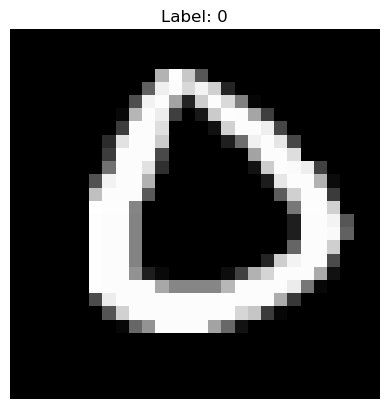

In [27]:
import matplotlib.pyplot as plt

index = index = np.random.randint(0, len(train_images))

plt.imshow(train_images[index].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[index]}")
plt.axis('off')
plt.show()


In [28]:
"""
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')

plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(6,6))\n\nfor i in range(9):\n    plt.subplot(3, 3, i+1)\n    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')\n    plt.title(train_labels[i])\n    plt.axis('off')\n\nplt.show()\n"